In [103]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns


In [2]:
EI=pd.read_csv('emp_info.csv')
EP=pd.read_csv('emp_performance.csv')
ES=pd.read_csv('emp_salary.csv')

In [3]:
EI.isnull().sum()

employee_id       0
business_areas    0
salary_bands      0
countries         0
gender            0
age               0
seniority         0
status            0
dtype: int64

In [4]:
EP.isnull().sum()

employee_id    0
performance    0
dtype: int64

In [5]:
ES.isnull().sum()

employee_id      0
salary_bands     0
annual_salary    0
dtype: int64

In [13]:
EI

,employee_id,business_areas,salary_bands,countries,gender,age,seniority,status
0,70212526,Manufacturing,Band 1,Poland,Female,18-24,0,Active
1,29344189,Manufacturing,Band 1,Poland,Female,18-24,1,Active
2,88067934,Manufacturing,Band 1,Poland,Female,18-24,0,Terminated
3,18375755,Manufacturing,Band 1,Poland,Female,18-24,3 to 4,Active
4,11476459,Manufacturing,Band 1,Poland,Female,18-24,1,Active
...,...,...,...,...,...,...,...,...
1097,76804258,Manufacturing,Band 6,Poland,Male,45-54,3 to 4,Active
1098,41067304,HR,Band 6,Belgium,Male,55+,1,Active
1099,52403864,LSCM,Band 6,Poland,Male,55+,1,Active
1100,75576832,R&D,Band 6,Germany,Male,55+,0,Active


In [23]:
ES

,employee_id,salary_bands,annual_salary
0,70212526,Band 1,16891.718104
1,29344189,Band 1,20122.838669
2,88067934,Band 1,18906.060972
3,18375755,Band 1,19205.354166
4,11476459,Band 1,21884.257402
...,...,...,...
1097,76804258,Band 6,284943.866063
1098,41067304,Band 6,272902.960613
1099,52403864,Band 6,185101.417872
1100,75576832,Band 6,257458.856474


In [24]:
EP

,employee_id,performance
0,70212526,Good
1,29344189,Good
2,88067934,Needs Improvement
3,18375755,Underperformer
4,11476459,Underperformer
...,...,...
1097,76804258,Good
1098,41067304,Exceptional
1099,52403864,Exceptional
1100,75576832,Exceptional


In [74]:
df=pd.merge(pd.merge(EI,EP, on='employee_id'),ES, on=['employee_id','salary_bands'])
df['annual_salary']=(df['annual_salary']/1000).round(3)
df

,employee_id,business_areas,salary_bands,countries,gender,age,seniority,status,performance,annual_salary
0,70212526,Manufacturing,Band 1,Poland,Female,18-24,0,Active,Good,16.892
1,29344189,Manufacturing,Band 1,Poland,Female,18-24,1,Active,Good,20.123
2,88067934,Manufacturing,Band 1,Poland,Female,18-24,0,Terminated,Needs Improvement,18.906
3,18375755,Manufacturing,Band 1,Poland,Female,18-24,3 to 4,Active,Underperformer,19.205
4,11476459,Manufacturing,Band 1,Poland,Female,18-24,1,Active,Underperformer,21.884
...,...,...,...,...,...,...,...,...,...,...
1097,76804258,Manufacturing,Band 6,Poland,Male,45-54,3 to 4,Active,Good,284.944
1098,41067304,HR,Band 6,Belgium,Male,55+,1,Active,Exceptional,272.903
1099,52403864,LSCM,Band 6,Poland,Male,55+,1,Active,Exceptional,185.101
1100,75576832,R&D,Band 6,Germany,Male,55+,0,Active,Exceptional,257.459


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_id     1102 non-null   int64  
 1   business_areas  1102 non-null   object 
 2   salary_bands    1102 non-null   object 
 3   countries       1102 non-null   object 
 4   gender          1102 non-null   object 
 5   age             1102 non-null   object 
 6   seniority       1102 non-null   object 
 7   status          1102 non-null   object 
 8   performance     1102 non-null   object 
 9   annual_salary   1102 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 86.2+ KB


In [10]:
m=df[df['gender']=='Male']['annual_salary'].mean().round(3)
f=df[df['gender']=='Female']['annual_salary'].mean().round(3)
print(f'Average male salary is {m} and average female salary is {f}')

Average male salary is 35904.559 and average female salary is 53647.986


In [11]:
fig= px.box(df,x='gender',y='annual_salary')
fig.show()

In [86]:
avg_bands = df.groupby(['salary_bands','gender']).agg({'annual_salary':'mean','employee_id':'count'}).reset_index()
avg_bands.columns=['salary_bands','gender','avg_salary','total_employee']
avg_bands

,salary_bands,gender,avg_salary,total_employee
0,Band 1,Female,21.534373,67
1,Band 1,Male,19.645020,541
2,Band 2,Female,40.247701,67
3,Band 2,Male,37.591046,216
4,Band 3,Female,74.321682,44
5,Band 3,Male,72.968040,75
6,Band 4,Female,99.754647,17
7,Band 4,Male,97.402745,47
8,Band 5,Female,151.488300,10
9,Band 5,Male,169.972400,10


In [94]:
fig = px.bar(avg_bands, x='salary_bands', y='avg_salary', color='gender',
             title='Average Salary by Gender and Salary Band',
             labels={'avg_salary': 'Average Salary'},barmode='group')


for i, row in average_salary.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['salary_bands']],
        y=[row['annual_salary']],
        text=[str(row['employee_id'])],
        mode='text',
        showlegend=False,
        textposition='top left'
    ))
    
fig.show()

In [98]:
df['performance'].unique()

array(['Good', 'Needs Improvement', 'Underperformer', 'Exceptional'],
      dtype=object)

In [101]:
avg_dept = df.groupby(['business_areas','performance','gender']).agg({'annual_salary':'mean','employee_id':'count'}).reset_index()
avg_dept.head()

,business_areas,performance,gender,annual_salary,employee_id
0,HR,Exceptional,Female,87.981625,8
1,HR,Exceptional,Male,153.013400,5
2,HR,Good,Female,70.908909,22
3,HR,Good,Male,71.532778,9
4,HR,Needs Improvement,Female,36.502500,2


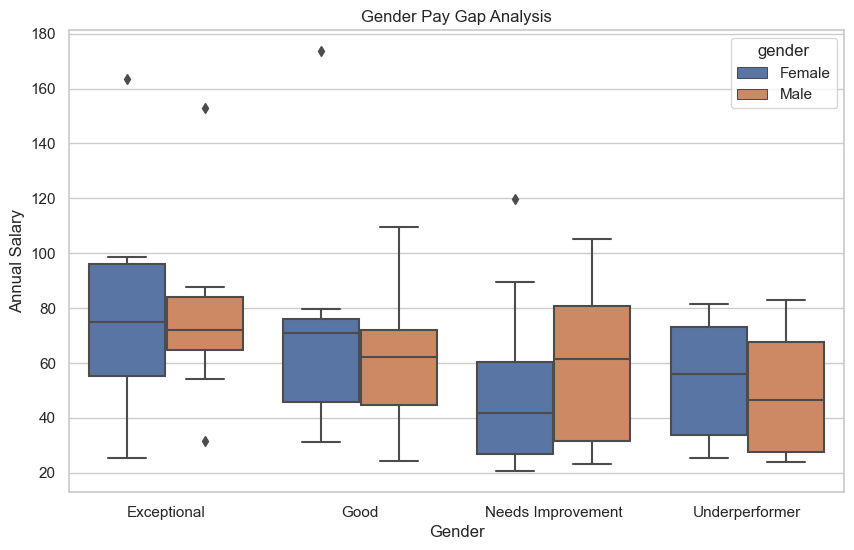

In [116]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a box plot to visualize the gender pay gap
sns.boxplot(x='performance', y="annual_salary",hue='gender', data=avg_dept)

plt.title('Gender Pay Gap Analysis')
plt.xlabel('Gender')
plt.ylabel('Annual Salary')
plt.show()